# Multiple Linear Regression

It also follows the same steps as in Simple Linear Regression.

### Import libraries

In [63]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

%matplotlib inline

### Load dataset

In [5]:
#Load dataset
df=pd.read_csv('economic_index.csv')
df.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


### Explore the data

In [6]:
df.shape

(24, 6)

In [7]:
list(df.columns)

['Unnamed: 0',
 'year',
 'month',
 'interest_rate',
 'unemployment_rate',
 'index_price']

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         24 non-null     int64  
 1   year               24 non-null     int64  
 2   month              24 non-null     int64  
 3   interest_rate      24 non-null     float64
 4   unemployment_rate  24 non-null     float64
 5   index_price        24 non-null     int64  
dtypes: float64(2), int64(4)
memory usage: 1.3 KB


### Data Preprocessing

In [9]:
#clean dataset by dropping unnecessary cols
df.drop(columns=['Unnamed: 0','year','month'],axis=1,inplace=True)

In [10]:
df.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [11]:
df.shape

(24, 3)

In [12]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   interest_rate      24 non-null     float64
 1   unemployment_rate  24 non-null     float64
 2   index_price        24 non-null     int64  
dtypes: float64(2), int64(1)
memory usage: 708.0 bytes


In [13]:
# Handle missing values and duplicates if any
df.isnull().sum()
# df.dropna(inplace = True)

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

In [14]:
df.duplicated().sum()
#df.drop_duplicates(inplace = True)

np.int64(0)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   interest_rate      24 non-null     float64
 1   unemployment_rate  24 non-null     float64
 2   index_price        24 non-null     int64  
dtypes: float64(2), int64(1)
memory usage: 708.0 bytes


In [16]:
df.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


### Visualize data

In [17]:
df.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


<Figure size 640x480 with 0 Axes>

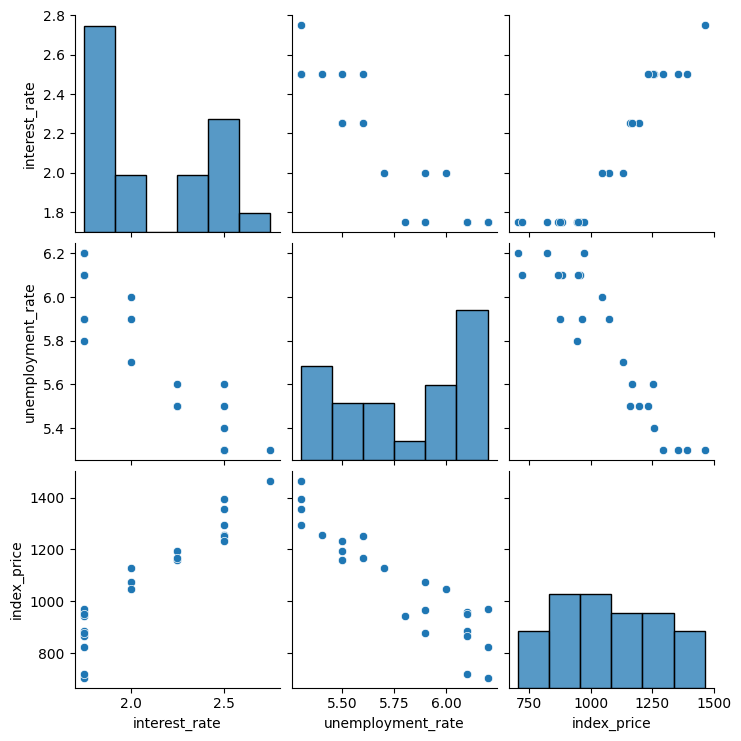

In [18]:
plt.figure(dpi=100)
sns.pairplot(df)
# plt.show()

<Axes: xlabel='interest_rate', ylabel='index_price'>

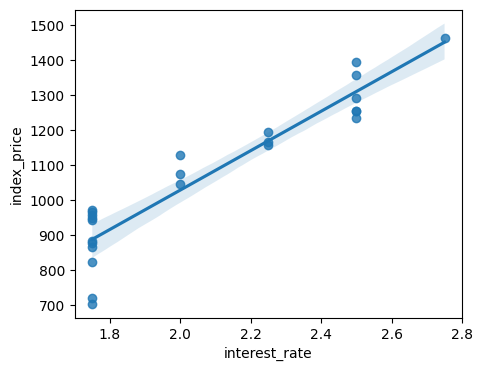

In [19]:
plt.figure(figsize=(5,4))
sns.regplot(x='interest_rate',y='index_price',data=df)

<Axes: xlabel='index_price', ylabel='unemployment_rate'>

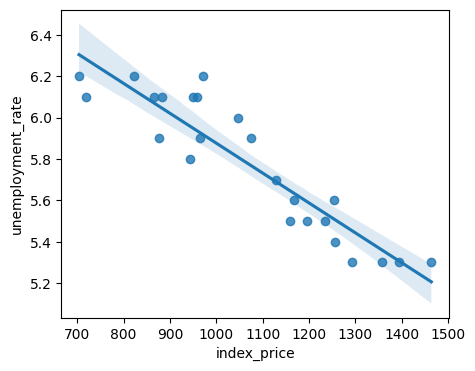

In [20]:
plt.figure(figsize=(5,4))
sns.regplot(x='index_price',y='unemployment_rate',data=df)

<Axes: xlabel='interest_rate', ylabel='unemployment_rate'>

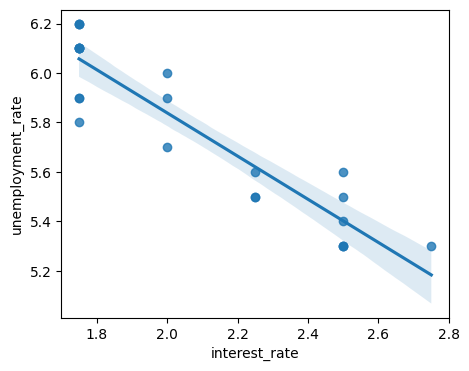

In [21]:
plt.figure(figsize=(5,4))
sns.regplot(x='interest_rate',y='unemployment_rate',data=df)

### Split the dataset

In [22]:
#label X & Y
X=df.iloc[:,:-1] #select all rows and all columns except last column
y=df.iloc[:,-1]  #select all rows and only last column

In [23]:
X.head()

,interest_rate,unemployment_rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.3
4,2.50,5.4


In [24]:
y.head()

0    1464
1    1394
2    1357
3    1293
4    1256
Name: index_price, dtype: int64

In [25]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

### Standardize data

In [26]:
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [27]:
X_train_scaled

array([[-0.90115511,  0.37908503],
       [ 1.31077107, -1.48187786],
       [-0.90115511,  1.30956648],
       [ 1.31077107, -0.55139641],
       [ 1.31077107, -1.48187786],
       [-0.16384638,  0.68924552],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -1.48187786],
       [ 1.31077107, -1.17171738],
       [-0.90115511,  1.30956648],
       [-0.90115511,  0.999406  ],
       [-0.90115511,  0.37908503],
       [-0.90115511,  0.999406  ],
       [ 0.57346234, -0.8615569 ],
       [-0.16384638, -0.24123593],
       [-0.90115511,  0.06892455],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -0.8615569 ]])

### Train the Model

In [28]:
model=LinearRegression(n_jobs=-1)
model.fit(X_train_scaled,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,-1
,positive,False


In [29]:
#cross validation
validation_score=cross_val_score(model,X_train_scaled,y_train,scoring='neg_mean_squared_error',cv=3)

In [30]:
np.mean(validation_score)

np.float64(-5914.828180162388)

### Prediction

In [31]:
y_pred=model.predict(X_test_scaled)
y_pred

array([1204.22770398,  821.65051903, 1406.51300368,  857.70889608,
        994.90992298, 1168.16932693])

### Evaluate the model

In [32]:
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)

print("mse: ",mse)
print("rmse: ",rmse)

mse:  5793.762887712569
rmse:  76.11677139574805


In [33]:
score=r2_score(y_test,y_pred)
print("R2 score: ",score)

R2 score:  0.8278978091457145


Adjusted R2 = 1 – [(1-R2)*(n-1)/(n-k-1)]

where:
R2: The R2 of the model
n: The number of observations 
k: The number of predictor variables

In [34]:
adjusted_r2= 1-(1-score)*(len(y_test)-1)/(len(y_test)-X_test_scaled.shape[1]-1)
print("Adjusted R2: ",adjusted_r2)

Adjusted R2:  0.7131630152428576


### Predict for new data

In [35]:
new_data=scaler.transform([[2.8,5.5]])
print(model.predict(new_data))

[1347.41310414]


c:\Users\285128\OneDrive - UST\Upskill\Datascience\ML\ML_Practice\pvenv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


### Assumptions 

visualizing results in Multiple Linear Regression (MLR) is a bit different from Simple Linear Regression, because you have multiple features, so you can’t just plot a single straight line easily.

We make assumptions to check how good our predictions are

References:

https://towardsdatascience.com/assumptions-of-multiple-linear-regression-d16f2eb8a2e7/

https://medium.com/@khadijasaleem.work/understanding-assumptions-of-multiple-linear-regression-3d75361a331f

##### 1. Linear Relationship (Actual vs Predicted Plot)

This shows how close the predicted values are to the actual target values.
If the model fits well, points should be near the diagonal line (follow a linear path).

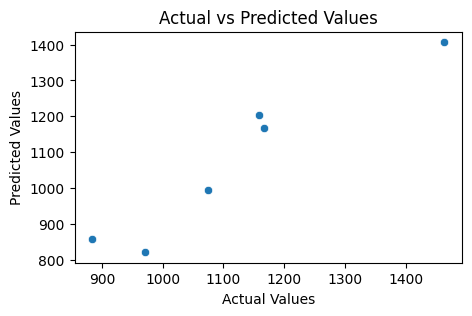

In [50]:
plt.figure(figsize=(5,3))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")

# plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # reference line
#meaning of above line:
# if actual Sales range from 5 to 25,
# → y_test.min() = 5, y_test.max() = 25
#ex: plt.plot([5, 25], [5, 25], 'r--')
# → Draw a line that starts at (5,5) and ends at (25,25).

plt.show()

##### 2. Normality of Residuals

Residuals should be roughly normally distributed. Two ways to check:

a. Histogram: should look roughly bell-shaped

b. Q–Q plot: points should lie close to the 45° line

Strong deviations → non-normal errors

In [55]:
residuals=y_test-y_pred
print(residuals)

8     -45.227704
16    149.349481
0      57.486996
18     26.291104
11     80.090077
9      -1.169327
Name: index_price, dtype: float64


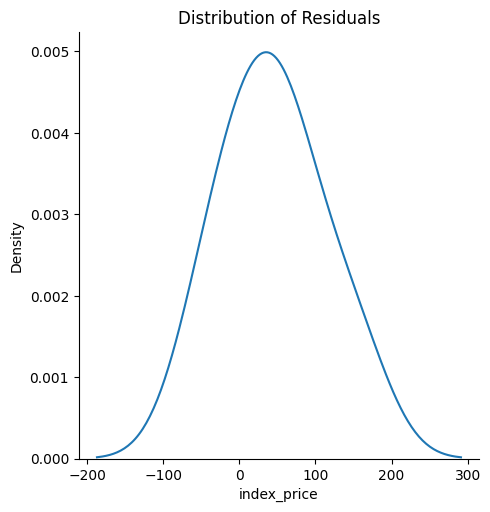

In [60]:
sns.displot(residuals,kind='kde')
plt.title("Distribution of Residuals")
plt.show()

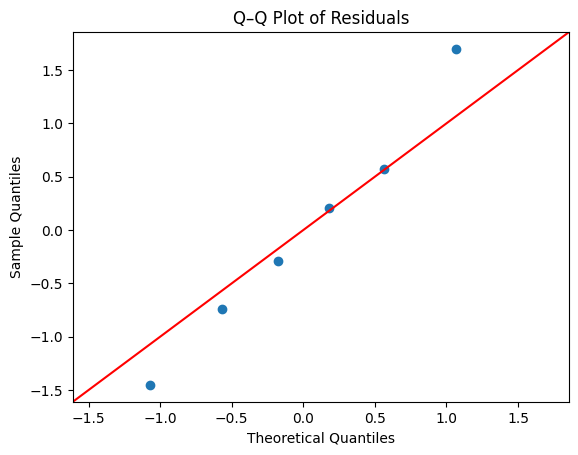

In [64]:
sm.qqplot(residuals, line='45', fit=True)
plt.title("Q–Q Plot of Residuals")
plt.show()

##### 3. Homoscedasticity (Constant Variance of Errors) (Residual Plot)

Residual = Actual − Predicted
This shows whether errors are randomly distributed (a key regression assumption).
Residuals should be scattered randomly around 0.
Patterns or curves → non-linearity or heteroscedasticity problem.

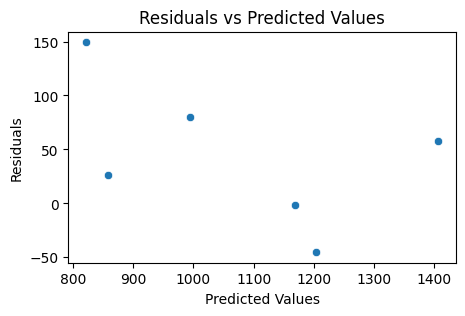

In [62]:
plt.figure(figsize=(5,3))
sns.scatterplot(x=y_pred, y=residuals)
# plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Values")
plt.show()

##### 4. Independence of Errors

Residuals should be independent — not correlated with each other.
(This is especially important for time-series data.)

Use the Durbin-Watson test (value between 0 and 4).

In [65]:
X_const = sm.add_constant(X_train_scaled)
ols_model = sm.OLS(y_train, X_const).fit()

from statsmodels.stats.stattools import durbin_watson

dw = durbin_watson(ols_model.resid)
print("Durbin-Watson:", dw)


Durbin-Watson: 1.8042921253633883


DW ≈ 2 → Residuals are independent

DW < 1 or > 3 → Autocorrelation (violation)

##### 5. No Multicollinearity

Independent variables (Predictors) are not highly correlated. Two ways to check:

a. Correlation Heatmap
b. VIF (Variance Inflation Factor):

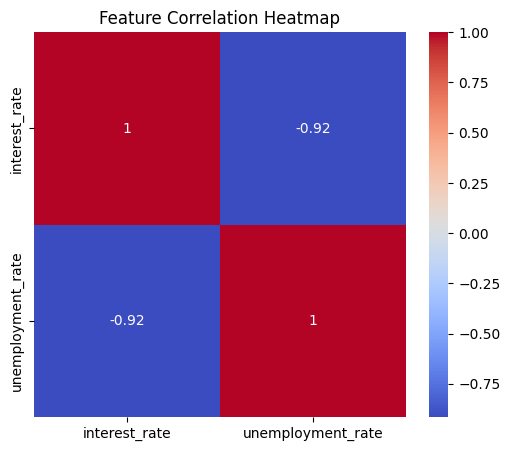

In [67]:
#correlation heatmap
plt.figure(figsize=(6,5))
sns.heatmap(X_train.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

In [88]:

X_const = pd.DataFrame(sm.add_constant(X_train_scaled))
X_const.head()

,0,1,2
0,1.0,-0.901155,0.379085
1,1.0,1.310771,-1.481878
2,1.0,-0.901155,1.309566
3,1.0,1.310771,-0.551396
4,1.0,1.310771,-1.481878


In [93]:
#VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["Feature"] = X_const.columns

vif["VIF"] = [variance_inflation_factor(X_const.values, i) 
              for i in range(len(X_const.columns))]
print(vif)


   Feature      VIF
0        0  1.00000
1        1  6.22381
2        2  6.22381


VIF Value	Interpretation

1–5        -------------->Acceptable

above 5 --------->Moderate multicollinearity

above 10 -------->Serious multicollinearity — fix it

##### 6. No Influential Outliers (optional)

Outliers can distort regression coefficients heavily.
Two was to check:

a. Standardized Residuals
b. Cook's Distance

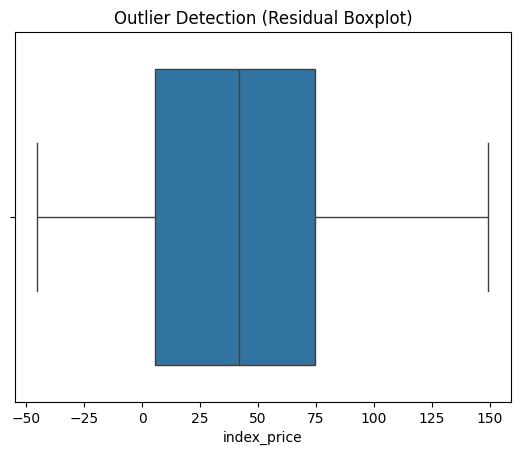

In [94]:
#standardized residuals boxplot
sns.boxplot(x=residuals)
plt.title("Outlier Detection (Residual Boxplot)")
plt.show()